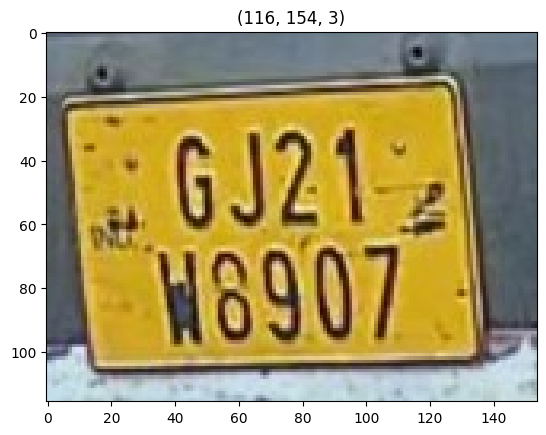

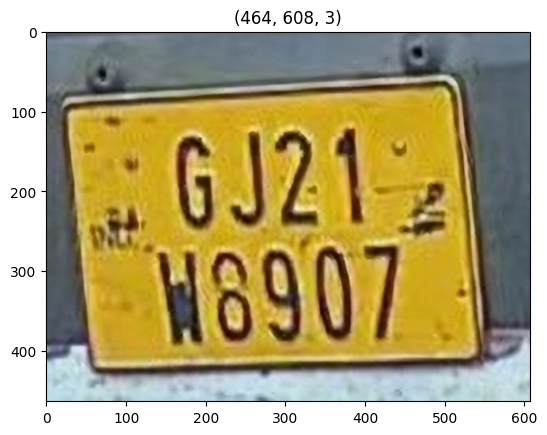

In [2]:
# Importing all the required packages and libraries
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

# Loading the image of the GFG Logo
img = cv2.imread('/content/C.jpeg')

image_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title(image_plot.shape)
plt.imshow(image_plot)
plt.show()

# Running the SR model

# Model to preprocess the images


def preprocessing(img):
    imageSize = (tf.convert_to_tensor(image_plot.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(
        img, 0, 0, imageSize[0], imageSize[1])
    preprocessed_image = tf.cast(cropped_image, tf.float32)
    return tf.expand_dims(preprocessed_image, 0)


# This is a model of Enhanced Super Resolution GAN Model
# The link given here is a model of ESRGAN model
esrgn_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(esrgn_path)

# Model to employ the model


def srmodel(img):
    preprocessed_image = preprocessing(img)  # Preprocess the LR Image
    new_image = model(preprocessed_image)  # Runs the model
    # returns the size of the original argument that is given as input
    return tf.squeeze(new_image) / 255.0


# Plot the HR image
hr_image = srmodel(image_plot)
plt.title(hr_image.shape)
plt.imshow(hr_image)
plt.show()

In [8]:
!pip install -qq super-image

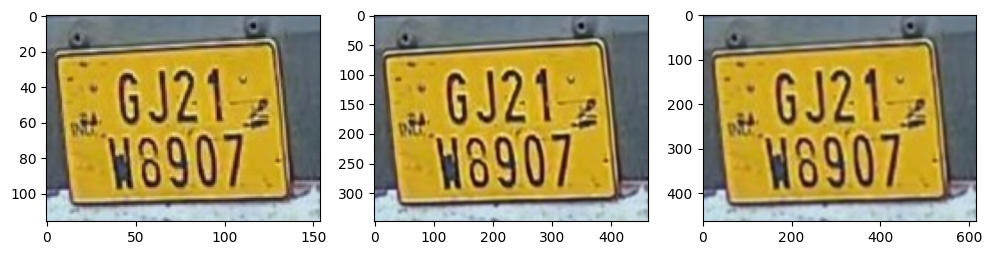

In [15]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
img = cv2.imread("/content/C.jpeg")
path = "/content/EDSR_x3.pb"

sr.readModel(path)

sr.setModel("edsr",4)

result = sr.upsample(img)

# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

In [16]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
img = cv2.imread("/content/C.jpeg")
path = "/content/EDSR_x3.pb"

sr.readModel(path)
sr.setModel("edsr", 4)
result = sr.upsample(img)
resized = cv2.resize(img, dsize=None, fx=4, fy=4)

# Save the original image
cv2.imwrite("original_image.jpg", img)

# Save the SR upscaled image
cv2.imwrite("sr_upscaled_image.jpg", result)

# Save the OpenCV upscaled image
cv2.imwrite("opencv_upscaled_image.jpg", resized)

True

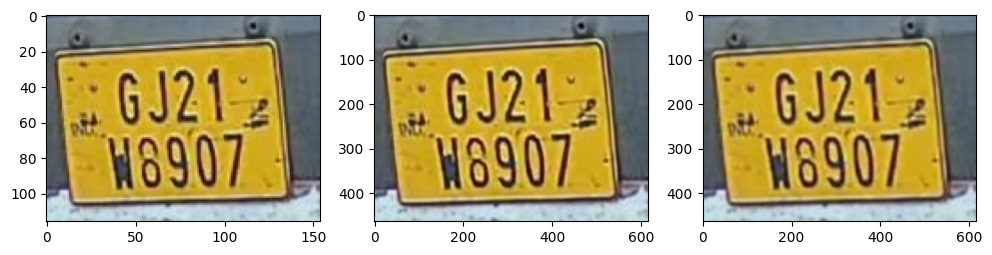

In [17]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
img = cv2.imread("/content/C.jpeg")
path = "/content/EDSR_x4.pb"

sr.readModel(path)

sr.setModel("edsr",4)

result = sr.upsample(img)

# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

 

F gu2t

ask



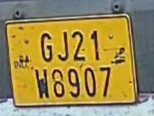

In [24]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

# Replace with the path to your image
image_path = '/content/C.jpeg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Convert the image to grayscale (optional but often improves accuracy)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Extract text from the image
text = pytesseract.image_to_string(img)

# Print the extracted text
print(text)

# Display the image with OpenCV (optional)
cv2_imshow(img)

6J21
H8907


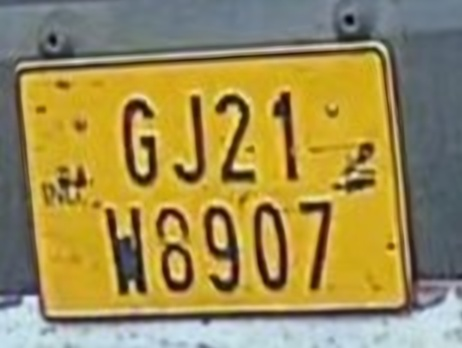

In [28]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

# Initialize the reader
reader = easyocr.Reader(['en']) # Specify the language(s) you want to use

# Replace with the path to your image
image_path = '/content/sr_upscaled_image.jpg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Perform OCR
results = reader.readtext(img)

# Print the extracted text
for (bbox, text, prob) in results:
    print(text)

# Display the image with OpenCV (optional)
cv2_imshow(img)

In [29]:
!wget https://drive.google.com/drive/folders/16PlVKhTNkSyWFx52RPb2hXPIQveNGbxS

--2025-01-17 10:16:13--  https://drive.google.com/drive/folders/16PlVKhTNkSyWFx52RPb2hXPIQveNGbxS
Resolving drive.google.com (drive.google.com)... 173.194.193.139, 173.194.193.101, 173.194.193.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.193.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘16PlVKhTNkSyWFx52RPb2hXPIQveNGbxS’

16PlVKhTNkSyWFx52RP     [  <=>               ] 263.32K   580KB/s    in 0.5s    

2025-01-17 10:16:14 (580 KB/s) - ‘16PlVKhTNkSyWFx52RPb2hXPIQveNGbxS’ saved [269643]



In [ ]:
import torch
import cv2
import numpy as np
from torchvision.transforms.functional import to_tensor, to_pil_image

# Load pretrained ESRGAN model
model_path = "ESRGAN.pth"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the ESRGAN model
model = torch.load(model_path)
model.eval()
model = model.to(device)

# Function to perform super-resolution
def super_resolve_image(input_image_path, output_image_path):
    # Read input image
    img = cv2.imread(input_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess the image
    input_tensor = to_tensor(img).unsqueeze(0).to(device)

    # Apply the model
    with torch.no_grad():
        output_tensor = model(input_tensor)

    # Convert back to image
    output_image = output_tensor.squeeze(0).cpu().numpy().transpose(1, 2, 0)
    output_image = (output_image * 255).clip(0, 255).astype(np.uint8)

    # Save the super-resolved image
    output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_image_path, output_image)
    print(f"Super-resolved image saved to {output_image_path}")

# Example usage
super_resolve_image("low_res_input.jpg", "high_res_output.jpg")

